In [0]:
import matplotlib.pyplot as plt

In [6]:
# --- Load data ---
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [41]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import fashion_mnist
import numpy as np

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [7]:
# --- Checking size of MNIST Set ---
print("The number of training examples: "+str(X_train.shape))
print("The number of test examples: "+str(X_test.shape))

The number of training examples: (60000, 28, 28)
The number of test examples: (10000, 28, 28)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.3682 - val_loss: 0.3289
Epoch 2/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.3235 - val_loss: 0.3197
Epoch 3/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.3155 - val_loss: 0.3099
Epoch 4/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.3098 - val_loss: 0.3071
Epoch 5/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.3061 - val_loss: 0.3069
Epoch 6/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.3041 - val_loss: 0.3032
Epoch 7/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.3021 - val_loss: 0.3067
Epoch 8/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.3005 - val_loss: 0.2989
Epoch 9/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.2994 - val_loss: 0.2999
Epoch

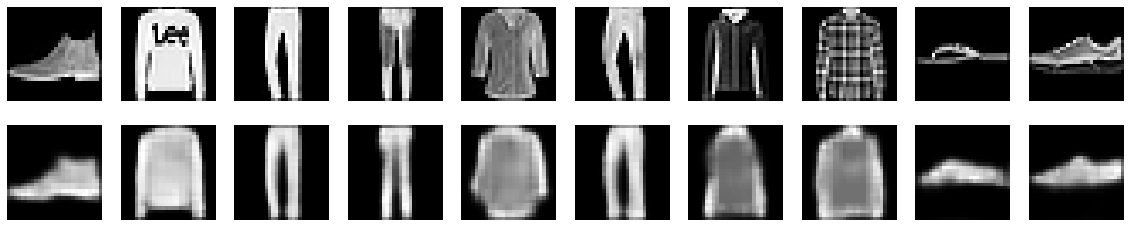

In [9]:
#autoencoder.save('Antoencoder.h5')

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

2

In [0]:
# ======================
#  Importing Librarires
# ======================
import tensorflow as tf
import keras
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

# For reproducibility
np.random.seed(123) 

In [0]:
# ===========================================
#  Importing model and core layers in Keras
# ==========================================
# Importing the sequential model in Keras
# Used as a linear stack of nn layers
from keras.models import Sequential

# Importing core neural networks layers 
from keras.layers import Dense, Dropout, Activation, Flatten

# Importing CNN layers
from keras.layers import Conv2D, MaxPooling2D

# Tools for data transformation
from keras.utils import np_utils

In [12]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# ========================
#  Data Munging/Reshaping
# ========================
# Declaring a depth of 1 for MNIST
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Setting up calues as float32s that are bounded between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Processing class labels they are currently a numeric vector
# ----> we need to transform them into categories
print(y_train.shape)
print(y_train[:10])

# We do this through one-hot encoding
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
# Check the shape
print(X_train.shape)
print(X_test.shape)

(60000,)
[9 0 0 3 0 2 7 2 5 5]
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
# =============================
#  Setting up the Architecture
# ============================
# Declaring sequential model
model = Sequential()
# CNN input layer: input_shape: (depth,width,height)
# CNN convolution: number of filters, height and width of kernel
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
# Notice here the the first entry output is none
print(model.output_shape)

# Next we add the remaining layers
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Setting up the fully connected layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.summary())

(None, 26, 26, 32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                294976    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0 

In [14]:
# =========================================
# Multigpu support Function Make-Parallel
# ========================================
# MultiGPU hack: 
# https://github.com/rossumai/keras-multi-gpu/tree/master/keras_tf_multigpu

# =====================
#  Compiling the model
# =====================
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# ===================
# Fitting the model
# ===================
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=128,
         verbose = 1)
# =====================
#  Evaluating the model
# =====================
score = model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.6216 - acc: 0.7818
Epoch 2/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.4127 - acc: 0.8543
Epoch 3/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.3635 - acc: 0.8706
Epoch 4/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.3303 - acc: 0.8818
Epoch 5/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.3093 - acc: 0.8889
Epoch 6/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.2909 - acc: 0.8953
Epoch 7/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.2733 - acc: 0.9011
Epoch 8/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.2611 - acc: 0.9059
Epoch 9/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.2499 - acc: 0.9098
Epoch 10/10
10000/10000 [==============================] - 6s 558us/step


In [15]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23543397921323778
Test accuracy: 0.9151


In [16]:
predicted_values = model.predict_classes(X_test[0:2**9],batch_size=32, verbose=1)
pd.crosstab(predicted_values, y_test[0:2**9],
            rownames=['Predicted Value'], colnames= ['True Value'] )

512/512 [==============================] - 0s 628us/step


True Value,0,1,2,3,4,5,6,7,8,9
Predicted Value,,,,,,,,,,
0,52,0,2,1,0,0,1,0,0,0
1,0,53,0,0,0,0,0,0,0,0
2,0,0,66,0,1,0,3,0,0,0
3,1,0,0,43,4,0,2,0,0,0
4,0,0,1,1,49,0,2,0,0,0
5,0,0,0,0,0,40,0,1,0,2
6,3,0,2,1,4,0,39,0,0,0
7,0,0,0,0,0,0,0,47,0,3
8,0,0,0,0,0,0,0,0,45,0


This network contains 2 convolution layers(ReLu activation function) each with 32 filters of 3 by 3, stride of 1 by 1.
The network also contains two dense layers with 64 and 10 neurons respectively. The last layer employed softmax function as the activation function.

The model is trained for 10 epochs. The size ratio of training set and test set is 6:1. The training accuracy is about 91.12%  and its test accuracy is aboout 91.52%.



2.2

In [0]:
from keras.applications import VGG16, VGG19
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import RMSprop

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Setting up calues as float32s that are bounded between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255



# We do this through one-hot encoding
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
X_train2 = X_train
X_test2 = X_test
X_train2 = np.c_[X_train,X_train,X_train]
X_test2 = np.c_[X_test, X_test,X_test]
X_train2 = np.asarray([img_to_array(array_to_img(im, scale  = False).resize((48,48))) for im in X_train2])/255
X_test2 = np.asarray([img_to_array(array_to_img(im, scale  = False).resize((48,48))) for im in X_test2])/255

In [47]:
###########################
# Coparing to a base model
###########################
# How does our CNN compare to a dense network?
# Declaring sequential model

conv_base = VGG19(weights="imagenet",include_top=False,input_shape=(48,48,3))
model_dense = Sequential()
model_dense.add(conv_base)
model_dense.add(Flatten())
model_dense.add(Dense(256, activation = "relu"))
model_dense.add(Dropout(0.5))
model_dense.add(Dense(128, activation = "relu"))
model_dense.add(Dropout(0.5))
model_dense.add(Dense(10, activation='softmax'))
print(model_dense.summary())

80142336/80134624 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (De

In [26]:
X_train2.shape, X_test2.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [48]:
conv_base.trainable = False
model_dense.trainable_weights

[<tf.Variable 'dense_4/kernel:0' shape=(512, 256) dtype=float32_ref>,
 <tf.Variable 'dense_4/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_5/kernel:0' shape=(256, 128) dtype=float32_ref>,
 <tf.Variable 'dense_5/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense_6/kernel:0' shape=(128, 10) dtype=float32_ref>,
 <tf.Variable 'dense_6/bias:0' shape=(10,) dtype=float32_ref>]

In [0]:
#  Compiling the model
model_dense.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [51]:
# Fitting the model
model_dense.fit(X_train2, Y_train,epochs=3,batch_size=128,verbose = 1)



Epoch 1/3
60000/60000 [==============================] - 1931s 32ms/step - loss: 2.3112 - acc: 0.0959
Epoch 2/3
60000/60000 [==============================] - 1930s 32ms/step - loss: 2.3027 - acc: 0.0984
Epoch 3/3
60000/60000 [==============================] - 1928s 32ms/step - loss: 2.3027 - acc: 0.1007


In [52]:
#  Evaluating the model
score_dense = model_dense.evaluate(X_test2, Y_test, verbose=1)

10000/10000 [==============================] - 329s 33ms/step


In [53]:
print('Test loss:', score_dense[0])
print('Test accuracy:', score_dense[1])

Test loss: 2.3026014457702635
Test accuracy: 0.1


We use pretrained VGG19 network with 2 dense layers in this model, we reshape the dataset into 48*48 as this pretrained model required a minimum size of 48*48. The training process for dense CNN takes lots of time and effort. If the GPU has better performance, I could increase the epoches and the model accuracy can be improved.



3.1 RNN

In [0]:
benigh = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt')
malicious = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt')

In [14]:
benigh.head(5)

,# GOOGLE
0,.0.blogger.gmodules.com
1,.0.client-channel.google.com
2,.0.docs.google.com
3,.0.drive.google.com
4,.0.gvt0.cn


In [16]:
benigh.columns = ['url']
benigh.head(5)

,url
0,.0.blogger.gmodules.com
1,.0.client-channel.google.com
2,.0.docs.google.com
3,.0.drive.google.com
4,.0.gvt0.cn


In [17]:
malicious.head(5)

,.1337x.pl
0,.1link.io
1,.1n.pm
2,.22apple.com
3,.22find.com
4,.2s5m19yk.ru


In [18]:
malicious.columns = ['url']
malicious.head(5)

,url
0,.1link.io
1,.1n.pm
2,.22apple.com
3,.22find.com
4,.2s5m19yk.ru


In [0]:
from keras.preprocessing import sequence
from keras.layers import Dense, SimpleRNN, LSTM, Embedding
from keras.models import Sequential
import numpy as np

In [0]:
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Bidirectional, SimpleRNN
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, SpatialDropout1D, Dropout, Conv1D, MaxPool1D, Flatten
from keras.models import Model
from sklearn.model_selection import train_test_split

In [0]:
benigh['class'] = 1
malicious['class'] = 0
np.random.seed(0)

In [0]:
df = pd.concat([benigh, malicious], ignore_index = True).reset_index()
tokenizer = Tokenizer(filters=None, char_level=True)
tokenizer.fit_on_texts(df['url'])

X_train = tokenizer.texts_to_sequences(df['url'])
y_train = df['class']
#y_train = np_utils.to_categorical(df['class'], 2)

max_features = 1000
maxlen = df['url'].str.len().max()

In [0]:
input_train, input_test, y_train, y_test  = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [0]:
input_train = sequence.pad_sequences(input_train, maxlen)
input_test = sequence.pad_sequences(input_test, maxlen)

In [26]:
input_train.shape

(47145, 86)

In [0]:
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, 64))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation='sigmoid'))

In [0]:
rnn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [29]:
rnn_model.fit(input_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
47145/47145 [==============================] - 19s 409us/step - loss: 0.0746 - acc: 0.9797
Epoch 2/5
47145/47145 [==============================] - 18s 392us/step - loss: 0.0281 - acc: 0.9876
Epoch 3/5
47145/47145 [==============================] - 19s 395us/step - loss: 0.0228 - acc: 0.9895
Epoch 4/5
47145/47145 [==============================] - 18s 390us/step - loss: 0.0214 - acc: 0.9901
Epoch 5/5
47145/47145 [==============================] - 19s 395us/step - loss: 0.0197 - acc: 0.9908


In [30]:
score = rnn_model.evaluate(input_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

20206/20206 [==============================] - 5s 262us/step
Test loss: 0.037806882052088854
Test accuracy: 0.9848064931208552


 3.2 CNN

In [31]:
#from keras.layers import Conv1D

cnn_model = Sequential()
cnn_model.add(Embedding(max_features, 64, input_length = maxlen))
cnn_model.add(Conv1D(32, 3, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 86, 64)            64000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 84, 32)            6176      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2688)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2689      
Total params: 72,865
Trainable params: 72,865
Non-trainable params: 0
_________________________________________________________________


In [32]:
cnn_model = Sequential()
cnn_model.add(Embedding(max_features, 64, input_length = maxlen))
cnn_model.add(Conv1D(128,activation='relu', kernel_size=3,padding='valid'))
cnn_model.add(SpatialDropout1D(0.1))
cnn_model.add(MaxPool1D())
cnn_model.add(Conv1D(64,activation='relu', kernel_size=3,padding='valid'))
cnn_model.add(SpatialDropout1D(0.1))
cnn_model.add(MaxPool1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 86, 64)            64000     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 84, 128)           24704     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 84, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 42, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 40, 64)            24640     
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 20, 64)            0         
__________

In [33]:
cnn_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
cnn_model.fit(input_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
47145/47145 [==============================] - 42s 901us/step - loss: 0.0693 - acc: 0.9811
Epoch 2/5
47145/47145 [==============================] - 42s 901us/step - loss: 0.0227 - acc: 0.9890
Epoch 3/5
47145/47145 [==============================] - 41s 875us/step - loss: 0.0196 - acc: 0.9908
Epoch 4/5
47145/47145 [==============================] - 42s 881us/step - loss: 0.0181 - acc: 0.9919
Epoch 5/5
47145/47145 [==============================] - 42s 883us/step - loss: 0.0165 - acc: 0.9926


In [34]:
score = cnn_model.evaluate(input_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

20206/20206 [==============================] - 5s 248us/step
Test loss: 0.021078685086080753
Test accuracy: 0.9904978719192319


3.3 

In [0]:
from sklearn.metrics import roc_curve, auc

pred_y_rnn = rnn_model.predict(input_test).ravel()
fpr_rnn, tpr_rnn, rnn_ = roc_curve(y_test, pred_y_rnn)

pred_y_cnn = cnn_model.predict(input_test).ravel()
fpr_cnn, tpr_cnn, cnn_ = roc_curve(y_test, pred_y_cnn)

In [0]:
auc_rnn = auc(fpr_rnn, tpr_rnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)

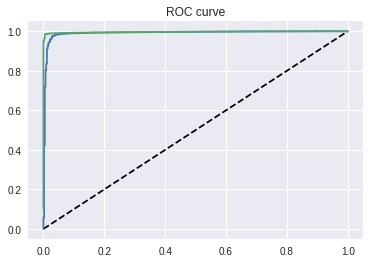

Rnn Accuracy 0.99034168163235
Cnn Accuracy 0.9965798192980748


In [38]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn)
plt.plot(fpr_cnn, tpr_cnn)
plt.title('ROC curve')
plt.show()

print("Rnn Accuracy", auc_rnn)
print("Cnn Accuracy", auc_cnn)

The AUC scores of both CNN and RNN are similar to each other and extremely close to 1. Thus both model have great performance. 